In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/superstore.csv', sep=',')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014/01/21,2014/01/23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017/05/04,2017/05/09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
# convert column names to lowercase followed by replacing spaces and dash with underscores
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
print(data.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  sub_category   9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

In [7]:
data.describe()

,row_id,postal_code,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# Checking for missing values
data.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

In [9]:
# convert the order date and ship date to datetime
data['order_date'] = pd.to_datetime(data['order_date'])
data['ship_date'] = pd.to_datetime(data['ship_date'])

In [10]:
data.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
# ship mode
data['ship_mode'].value_counts()

ship_mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [12]:
# distribution of segment column
data['segment'].value_counts()

segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [13]:
data['city'].value_counts().head(10)

city
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: count, dtype: int64

In [14]:
data['region'].value_counts()

region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [15]:
data['product_id'].nunique()

1862

In [16]:
data['category'].value_counts()

category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [17]:
data['sub_category'].value_counts()

sub_category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

In [18]:
data[['sales','quantity', 'profit']].describe()

,sales,quantity,profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,28.656896
std,623.245101,2.225110,234.260108
min,0.444000,1.000000,-6599.978000
25%,17.280000,2.000000,1.728750
50%,54.490000,3.000000,8.666500
75%,209.940000,5.000000,29.364000
max,22638.480000,14.000000,8399.976000


# Customer Analysis
1. Which customer segment uses the shipping service the most?
2. What is the average order value for each customer segment?
3. what is the most profitable customer segment?
4. From which city do most of the customers come from?
5. What is the average order value for each city?
6. Customers contributed by sales, quantity and profit.
7. Top 10 Customers from company grained profit.
8. Top 10 Customers from company had loss.

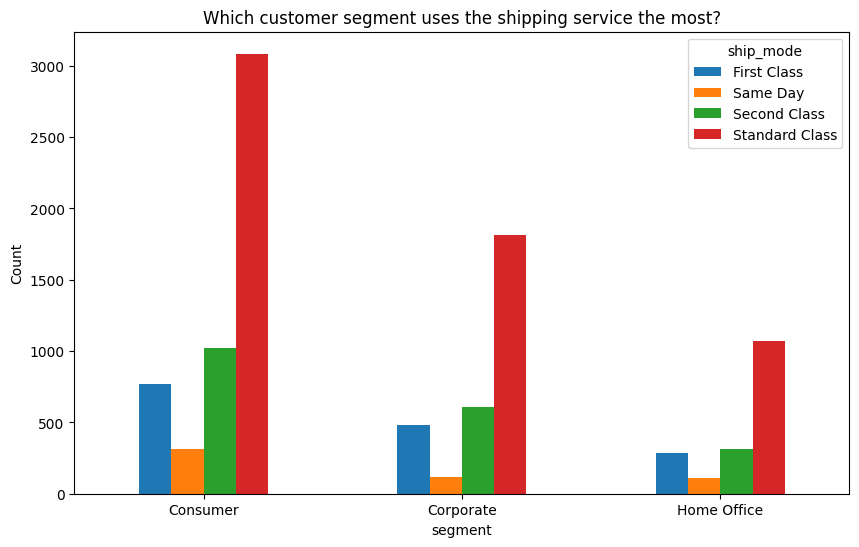

In [19]:
# 1. Which customer segment uses the shipping service the most?

segment_ship_mode = data.groupby('segment')['ship_mode'].value_counts().unstack()

segment_ship_mode.plot(kind='bar', figsize=(10, 6))
plt.title('Which customer segment uses the shipping service the most?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

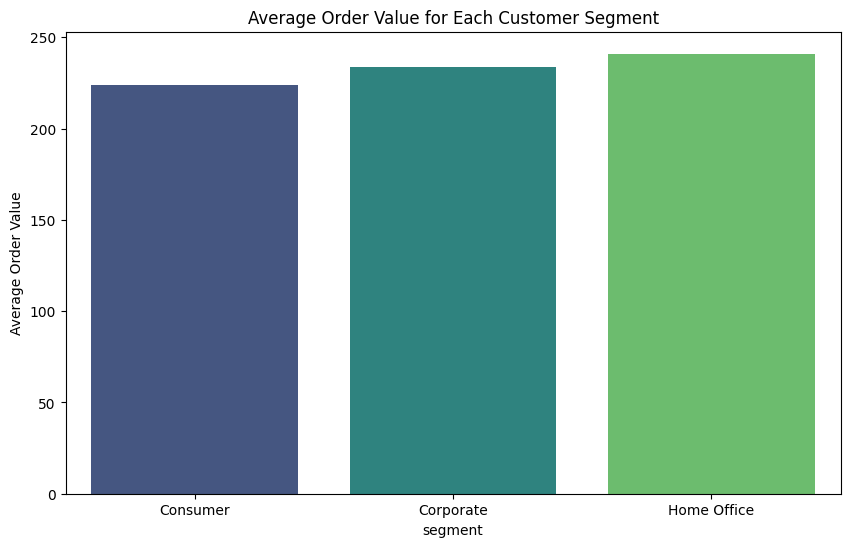

In [20]:
# What is the average order value for each customer segment?

segment_avg_order_value = data.groupby('segment')['sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='segment', y='sales', data=segment_avg_order_value, palette='viridis')
plt.title('Average Order Value for Each Customer Segment')
plt.ylabel('Average Order Value')
plt.show()

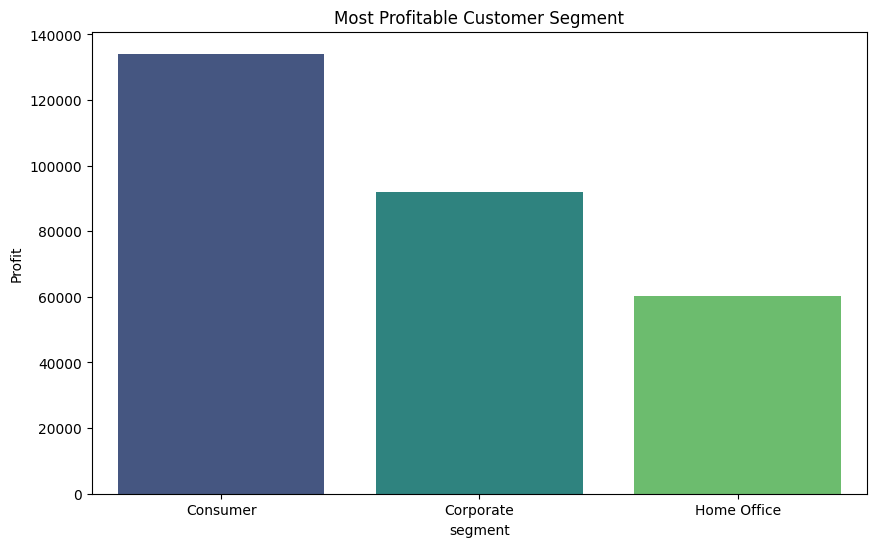

In [21]:
# what is the most profitable customer segment?

segment_profit = data.groupby('segment')['profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='segment', y='profit', data=segment_profit, palette='viridis')
plt.title('Most Profitable Customer Segment')
plt.ylabel('Profit')
plt.show()


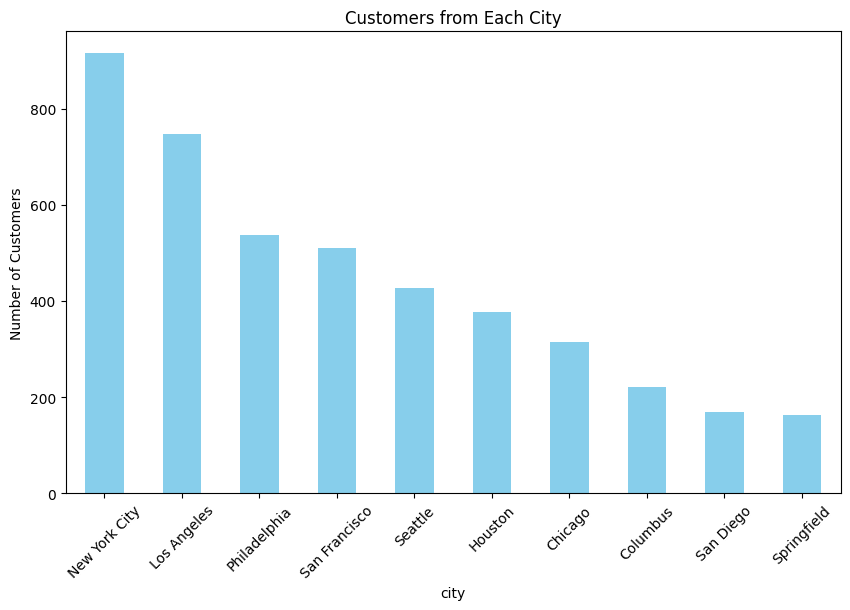

In [22]:
# From which city do most of the customers come from?

city_customers = data['city'].value_counts().head(10)

plt.figure(figsize=(10, 6))
city_customers.plot(kind='bar', color='skyblue')
plt.title('Customers from Each City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

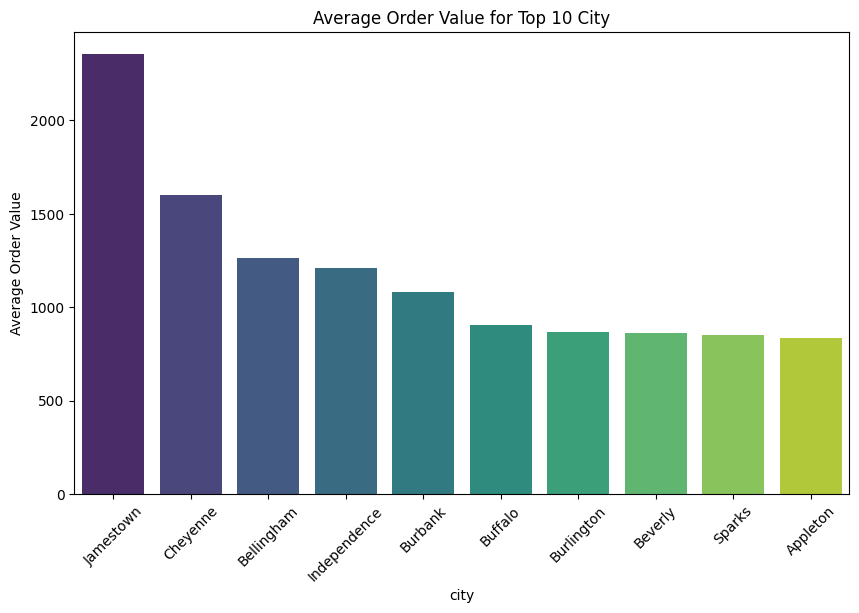

In [23]:
# What is average order value for top 10 city?

city_avg_order_value = data.groupby('city')['sales'].mean().reset_index().sort_values(by='sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='sales', data=city_avg_order_value, palette='viridis')
plt.title('Average Order Value for Top 10 City')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.show()

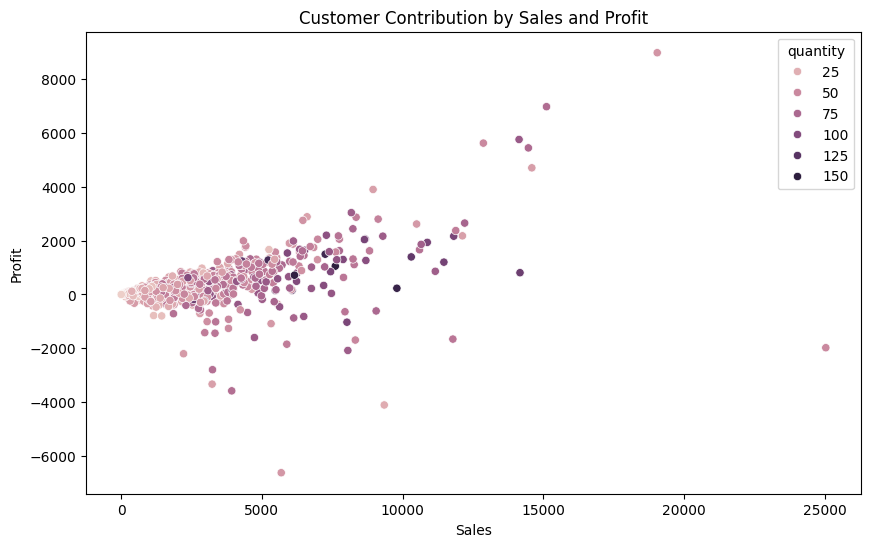

In [24]:
# Customers contributed by sales, quantity and profit.

customer_contribution = data.groupby('customer_name')[['sales', 'quantity', 'profit']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='profit', data=customer_contribution, color='purple', hue='quantity')
plt.title('Customer Contribution by Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

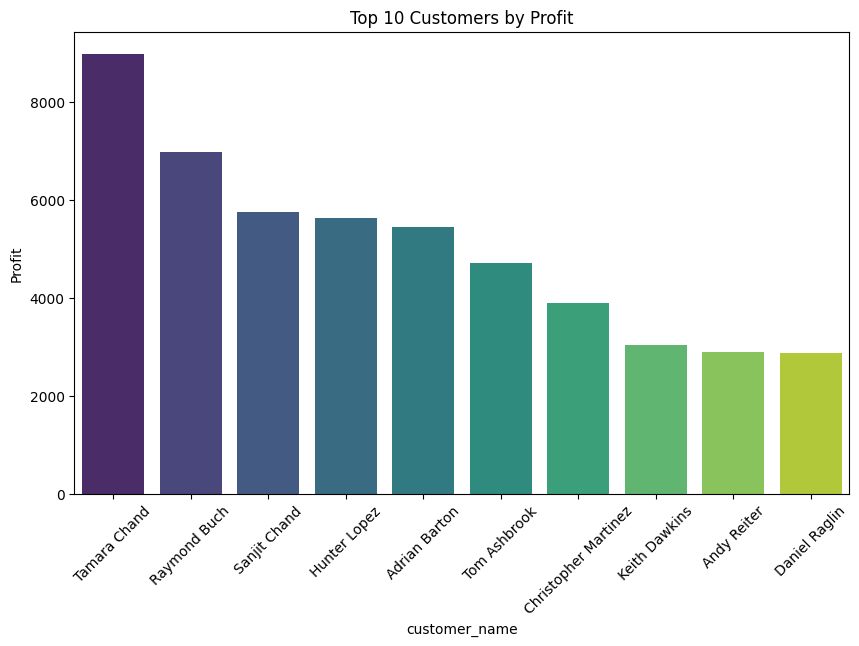

In [25]:
# Top 10 Customers from company grained profit.

customer_contribution_profit = customer_contribution.sort_values(by='profit', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='customer_name', y='profit', data=customer_contribution_profit, palette='viridis')
plt.title('Top 10 Customers by Profit')
plt.ylabel('Profit')
plt.xticks(rotation=45)

plt.show()


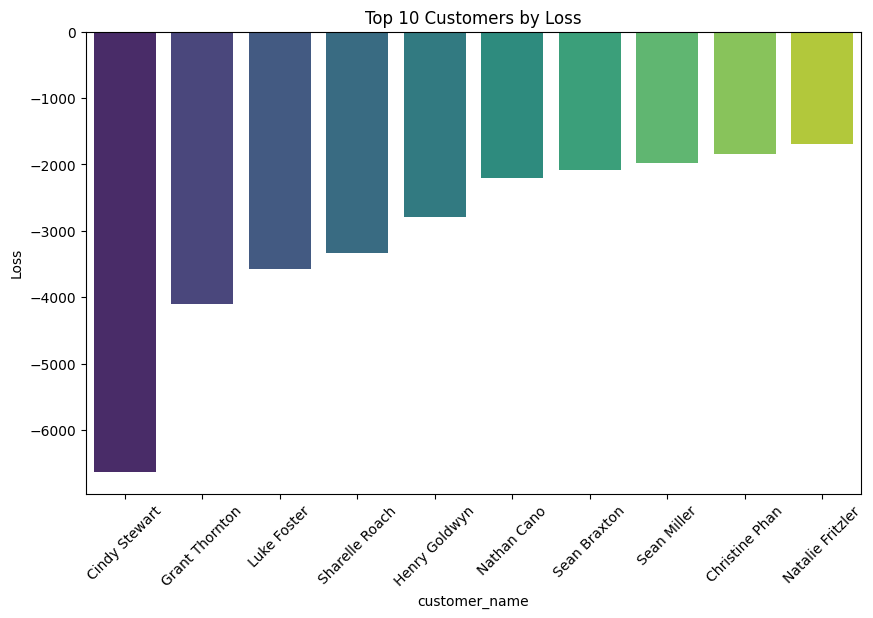

In [26]:
# Top 10 Customers from company had loss.

customer_contribution_loss = customer_contribution.sort_values(by='profit', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_name', y='profit', data=customer_contribution_loss, palette='viridis')
plt.title('Top 10 Customers by Loss')
plt.ylabel('Loss')
plt.xticks(rotation=45)
plt.show()


In [27]:
data.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Category Analysis 

1. Product Category and Sub Category by Sales
2. Profit by Category and Sub Category
3. Loss by Category and Sub Category

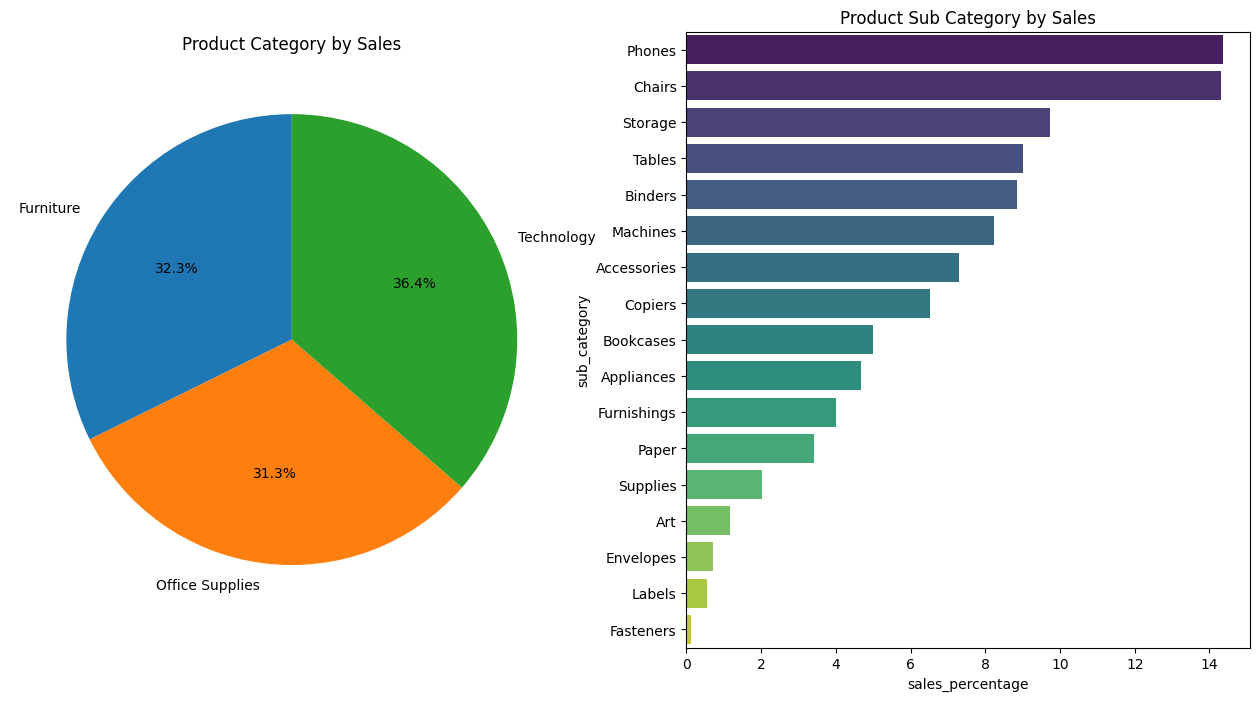

In [28]:
# 1. Product Category and Sub Category by Sales 

category_sub_category_sales = data.groupby(['category', 'sub_category'])['sales'].sum().sort_values(ascending=False).reset_index()
category_sub_category_sales['sales_percentage'] = category_sub_category_sales['sales']/category_sub_category_sales['sales'].sum()*100
category_sales = category_sub_category_sales.groupby('category')['sales'].sum().reset_index()


fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.pie(category_sales['sales'], labels=category_sales['category'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Product Category by Sales')
sns.barplot(x='sales_percentage', y='sub_category', data=category_sub_category_sales, ax=ax2, palette='viridis')
ax2.set_title('Product Sub Category by Sales')
plt.show()

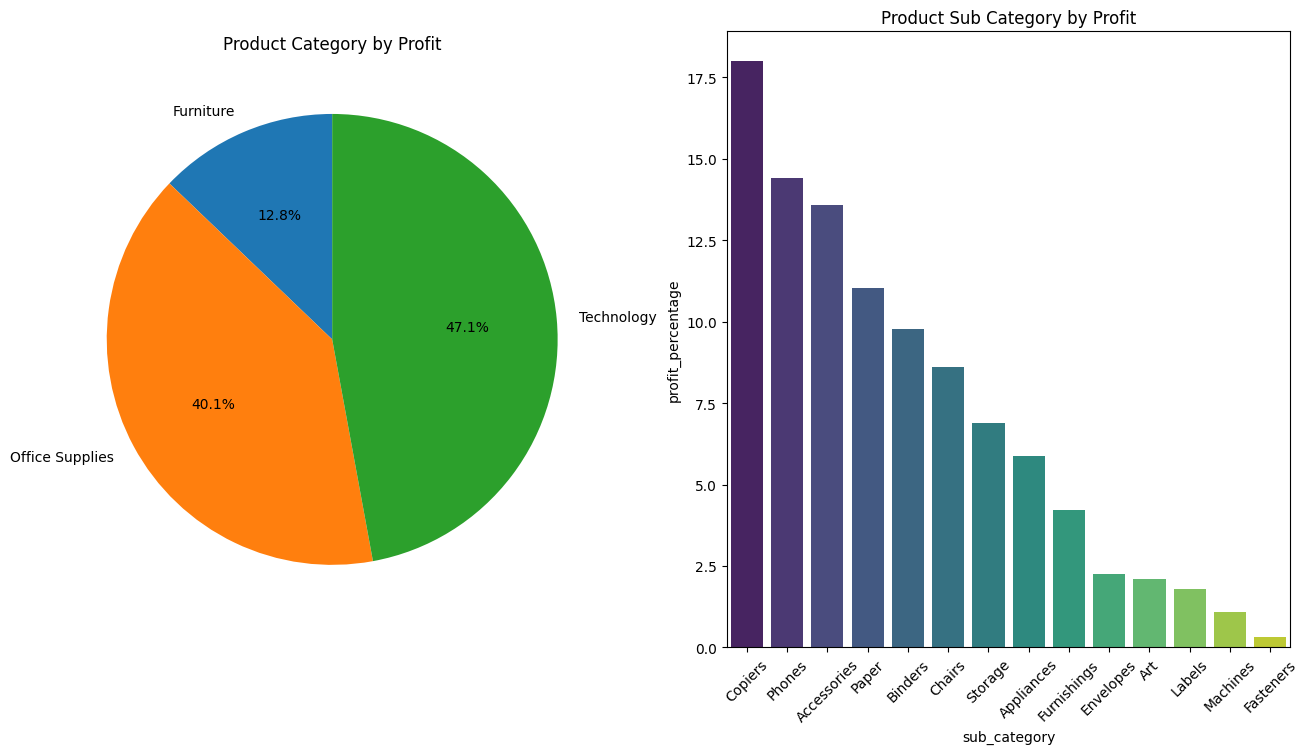

In [29]:
# 2. Product Category and Sub Category by Profit in piechart

category_sub_category_profit_loss = data.groupby(['category', 'sub_category'])['profit'].sum().reset_index()
category_sub_category_profit = category_sub_category_profit_loss[category_sub_category_profit_loss['profit'] > 0].sort_values(by='profit', ascending=False)
category_sub_category_profit['profit_percentage'] = category_sub_category_profit['profit'] / category_sub_category_profit['profit'].sum() * 100
category_profit = category_sub_category_profit.groupby('category')['profit'].sum().reset_index()

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.pie(category_profit['profit'], labels=category_profit['category'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Product Category by Profit')
sns.barplot(x='sub_category', y='profit_percentage', data=category_sub_category_profit, palette='viridis', ax=ax2, ci=None)
ax2.set_title('Product Sub Category by Profit')
plt.xticks(rotation=45)
plt.show()

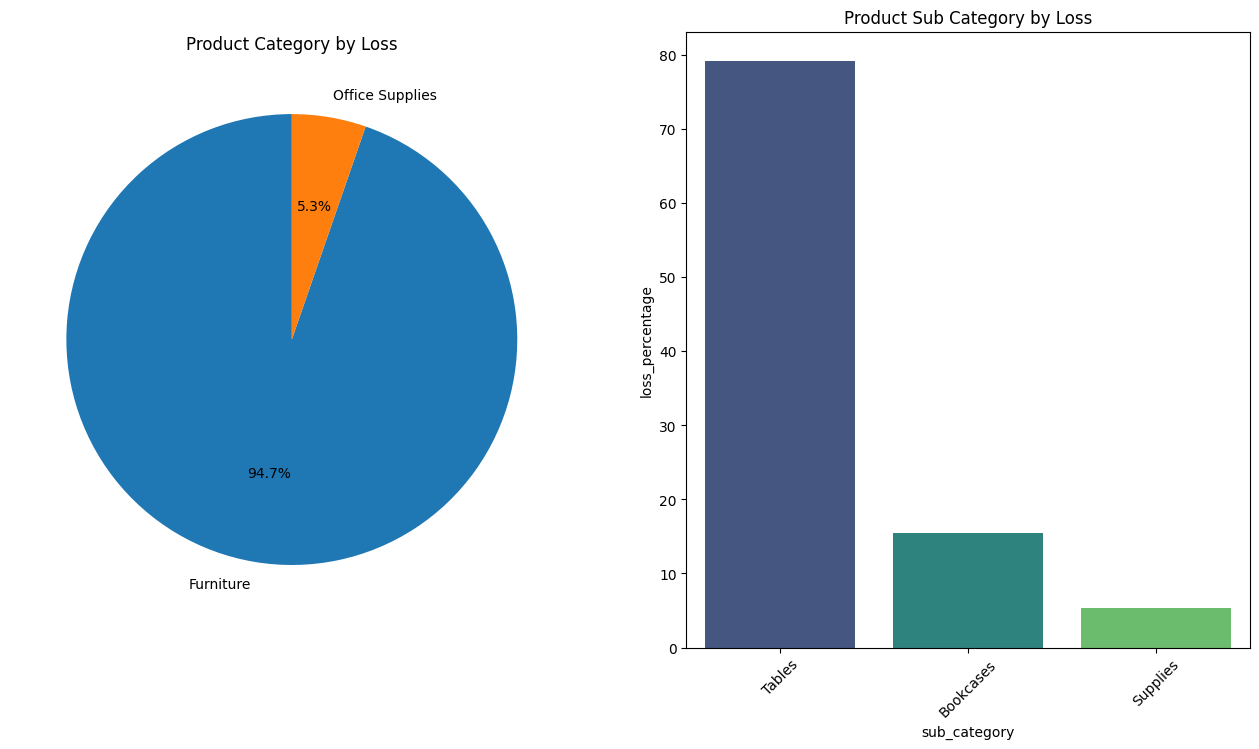

In [30]:
# 3. Loss by Category and Sub Category
category_sub_category_loss = category_sub_category_profit_loss[category_sub_category_profit_loss['profit'] < 0].sort_values(by='profit', ascending=True)
category_sub_category_loss['loss_percentage'] = category_sub_category_loss['profit'] / category_sub_category_loss['profit'].sum() * 100
category_loss = category_sub_category_loss.groupby('category')['profit'].sum().abs().reset_index()


fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.pie(category_loss['profit'], labels=category_loss['category'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Product Category by Loss')
sns.barplot(x='sub_category', y='loss_percentage', data=category_sub_category_loss, palette='viridis', ax=ax2, ci=None)
ax2.set_title('Product Sub Category by Loss')
plt.xticks(rotation=45)
plt.show()

